DAVID ANDRES GALINDO CRUZ - DIEGO ESTEBAN BARRETO ROA

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data

In [ ]:
pd.set_option('display.max_columns', None) #Mostrar todas las columnas
sns.set(rc={'figure.figsize':(12.7,8.6)})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/ACCIDENTALIDAD_BARRANQUILLA.xlsx', 
                 index_col=0,
                 dtype={
                     'Nit Entidad': str
                 })
data.head()

,MES_ACCIDENTE,CONDICION_VICTIMA,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SERVICIO_VEHICULO_VICTIMA,CLASE_VEHICULO_VICTIMA,SEXO_VICTIMA,EDAD_VICTIMA,CANTIDAD_VICTIMAS,MES
AÑO_ACCIDENTE,,,,,,,,,,
2.018,Marzo,Pasajero,herido,Choque,PUBLICO,BUSETA,M,1.0,1,3
2.018,Junio,Pasajero,herido,Choque,PUBLICO,AUTOMOVIL,F,1.0,1,6
2.018,Marzo,Acompañante,herido,Choque,PARTICULAR,MOTOCICLETA,M,10.0,1,3
2.018,Abril,Acompañante,herido,Choque,PARTICULAR,AUTOMOVIL,M,10.0,1,4
2.018,Mayo,Acompañante,herido,Choque,PARTICULAR,MOTOCICLETA,M,10.0,1,5


Accidentes en Barranquilla a partir del año 2016, actualizado hasta el 26 de octubre de 2018. Datos brindados por la Alcaldía Distrital de Barranquilla, Distrito Especial, Industrial y Portuario

In [ ]:
data.dtypes

MES_ACCIDENTE                 object
CONDICION_VICTIMA             object
GRAVEDAD_ACCIDENTE            object
CLASE_ACCIDENTE               object
SERVICIO_VEHICULO_VICTIMA     object
CLASE_VEHICULO_VICTIMA        object
SEXO_VICTIMA                  object
EDAD_VICTIMA                 float64
CANTIDAD_VICTIMAS              int64
MES                            int64
dtype: object

In [ ]:
data

,MES_ACCIDENTE,CONDICION_VICTIMA,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SERVICIO_VEHICULO_VICTIMA,CLASE_VEHICULO_VICTIMA,SEXO_VICTIMA,EDAD_VICTIMA,CANTIDAD_VICTIMAS,MES
AÑO_ACCIDENTE,,,,,,,,,,
2.018,Marzo,Pasajero,herido,Choque,PUBLICO,BUSETA,M,1.0,1,3
2.018,Junio,Pasajero,herido,Choque,PUBLICO,AUTOMOVIL,F,1.0,1,6
2.018,Marzo,Acompañante,herido,Choque,PARTICULAR,MOTOCICLETA,M,10.0,1,3
2.018,Abril,Acompañante,herido,Choque,PARTICULAR,AUTOMOVIL,M,10.0,1,4
2.018,Mayo,Acompañante,herido,Choque,PARTICULAR,MOTOCICLETA,M,10.0,1,5
...,...,...,...,...,...,...,...,...,...,...
2.016,Diciembre,Peaton,herido,Atropello,PUBLICO,BUS,M,84.0,1,12
2.016,Diciembre,Motociclista,muerto,Choque,PARTICULAR,MOTOCICLETA,M,49.0,1,12
2.016,Diciembre,Pasajero,herido,Choque,PUBLICO,AUTOMOVIL,F,63.0,1,12


In [ ]:
data.describe(include=['O'])

,MES_ACCIDENTE,CONDICION_VICTIMA,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SERVICIO_VEHICULO_VICTIMA,CLASE_VEHICULO_VICTIMA,SEXO_VICTIMA
count,3539,3539,3539,3539,3539,3539,3539
unique,12,8,2,6,5,17,2
top,Mayo,Motociclista,herido,Choque,PARTICULAR,MOTOCICLETA,M
freq,370,1351,3439,2676,2416,2051,2745


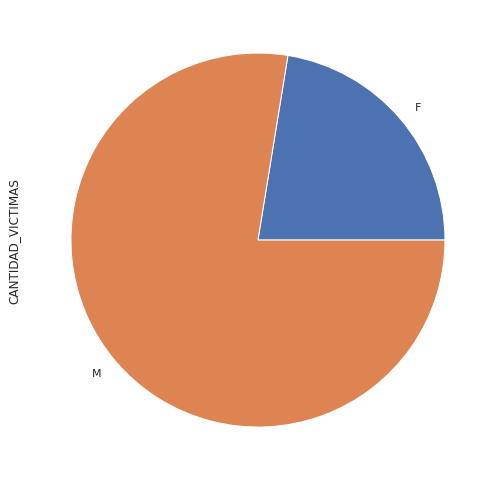

In [ ]:
data.CANTIDAD_VICTIMAS.groupby(data.SEXO_VICTIMA).sum().plot(kind="pie")

In [ ]:
tab = data['CLASE_ACCIDENTE'].value_counts().rename_axis('label').reset_index(name='counts')
tab

,label,counts
0,Choque,2676
1,Atropello,656
2,Caida Ocupante,71
3,Otro,61
4,Volcamiento,53
5,Incendio,22


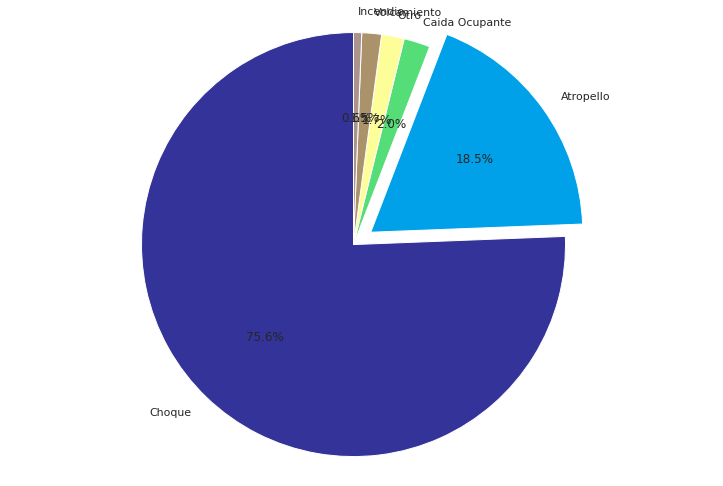

In [ ]:
from matplotlib import cm
explode = (0, 0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
n = len(tab['counts'])
colors = [cm.terrain(i / n) for i in range(n)]

fig1, ax1 = plt.subplots()
ax1.pie(tab['counts'], explode = explode, labels=tab['label'], autopct='%1.1f%%',
        shadow=False, startangle=90, colors = colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


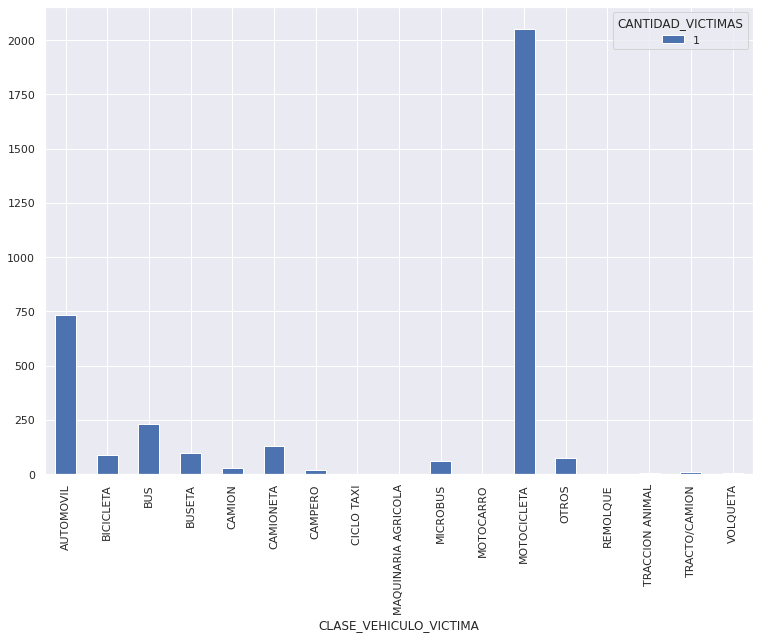

In [ ]:

print(data.groupby(['CANTIDAD_VICTIMAS', 'CLASE_VEHICULO_VICTIMA'])
        .count()['MES_ACCIDENTE']
        .unstack(level=0)
        .plot.bar())

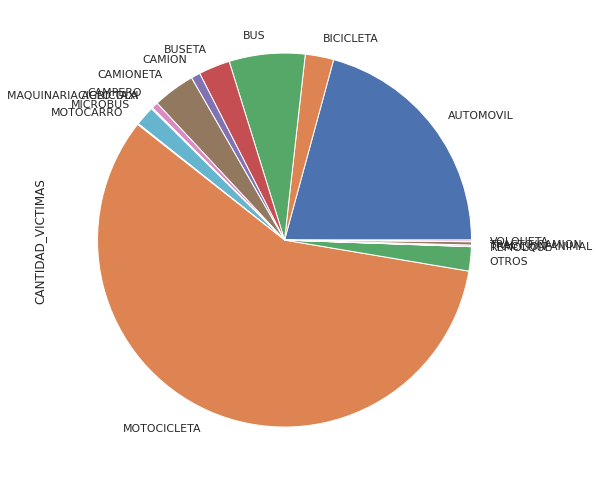

In [ ]:
data.CANTIDAD_VICTIMAS.groupby(data.CLASE_VEHICULO_VICTIMA).sum().plot(kind="pie")

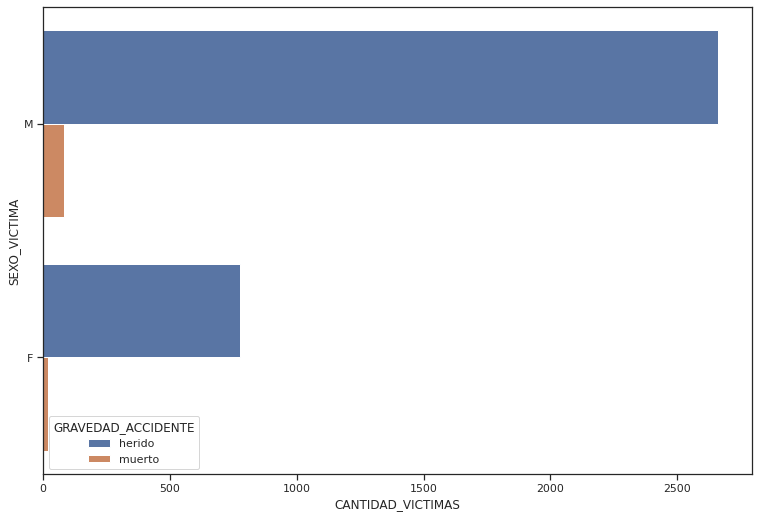

In [ ]:
sns.barplot(data = data,
            estimator = sum,
            x = "CANTIDAD_VICTIMAS", 
            y = "SEXO_VICTIMA",
            hue = "GRAVEDAD_ACCIDENTE",
            ci = None)

In [ ]:
data["CLASE_VEHICULO_VICTIMA"].value_counts()

MOTOCICLETA            2051
AUTOMOVIL               735
BUS                     232
CAMIONETA               129
BUSETA                   96
BICICLETA                87
OTROS                    74
MICROBUS                 60
CAMION                   28
CAMPERO                  20
TRACTO/CAMION            10
VOLQUETA                  5
TRACCION ANIMAL           4
MOTOCARRO                 3
MAQUINARIA AGRICOLA       2
CICLO TAXI                2
REMOLQUE                  1
Name: CLASE_VEHICULO_VICTIMA, dtype: int64

In [ ]:
data["CLASE_ACCIDENTE"].value_counts()

Choque            2676
Atropello          656
Caida Ocupante      71
Otro                61
Volcamiento         53
Incendio            22
Name: CLASE_ACCIDENTE, dtype: int64

In [ ]:
tab1 = pd.crosstab(data["CLASE_VEHICULO_VICTIMA"],data["CLASE_ACCIDENTE"])
tab1

CLASE_ACCIDENTE,Atropello,Caida Ocupante,Choque,Incendio,Otro,Volcamiento
CLASE_VEHICULO_VICTIMA,,,,,,
AUTOMOVIL,176,1,542,0,3,13
BICICLETA,6,0,81,0,0,0
BUS,53,40,116,22,0,1
BUSETA,13,9,56,0,1,17
CAMION,15,0,12,0,0,1
CAMIONETA,34,1,84,0,0,10
CAMPERO,7,0,12,0,0,1
CICLO TAXI,0,0,2,0,0,0
MAQUINARIA AGRICOLA,1,0,1,0,0,0


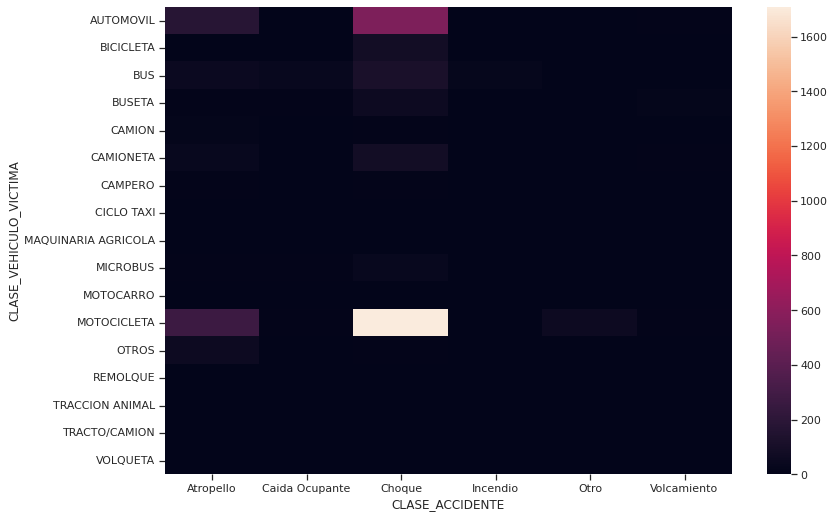

In [ ]:
ax = sns.heatmap(tab1, cmap="rocket")

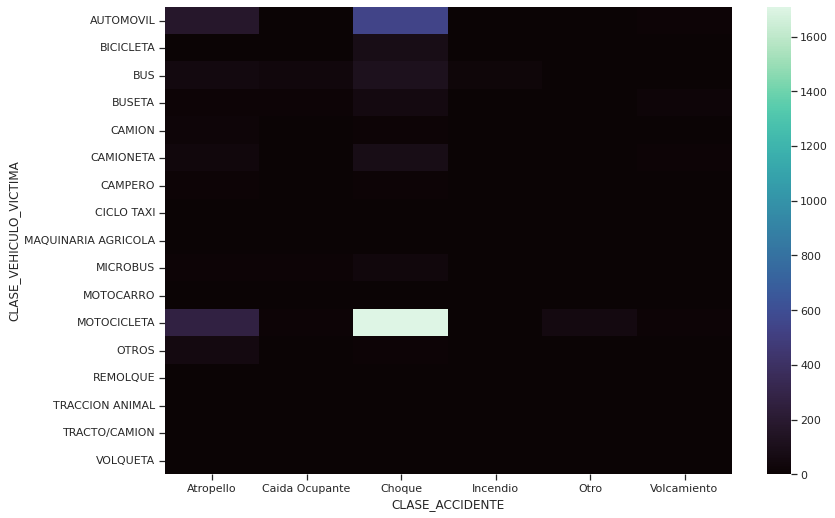

In [ ]:
ax2 = sns.heatmap(tab1, cmap="mako")

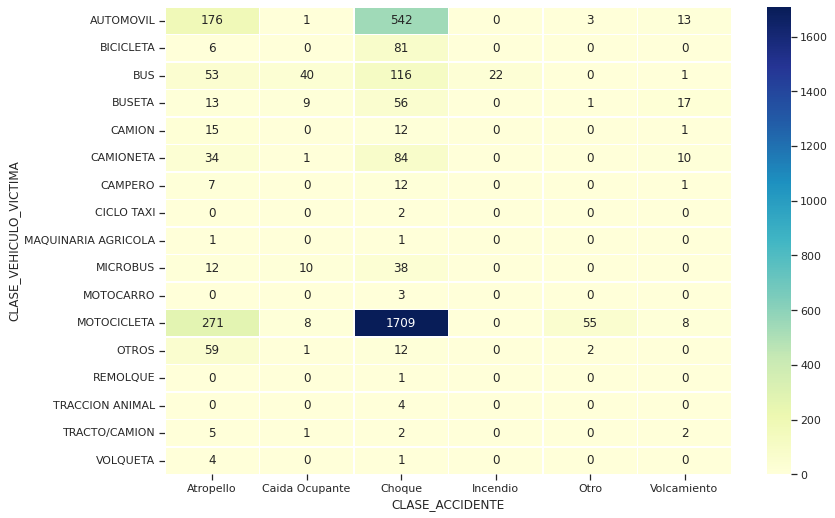

In [ ]:
ax = sns.heatmap(tab1,
                 annot=True, 
                 fmt="d",
                 linewidths=.5,
                 cmap="YlGnBu")